In [417]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

In [418]:
data = pd.read_csv("Telco-Customer-Churn.csv")
data.head()

#We see the general outline of our data and can get an idea which features should be numerical and which categorical
#From here we can understand that customerID is meaningless as it is simply used to identify each customer and should have no correlation

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [419]:
data.drop('customerID', axis=1, inplace=True)
data.shape

(7043, 20)

In [420]:
data.drop_duplicates()
data.info()

#TotalCharges is categorised as an object type but we understand that it should be a number

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [421]:
data.describe()
#We saw that TotalCharges is an object type and hence it doesn't appear here, so we need to convert it to float 
#We also see that there are very few numerical features meaning the majority will be categorical 

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [422]:
data.isnull().sum().sort_values(ascending=False)
#no null values

gender              0
SeniorCitizen       0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
Churn               0
dtype: int64

In [423]:
#data['TotalCharges'] = data['TotalCharges'].astype(float)
#the above code to convert the variable type resulted in an error,
#"could not convert string to float: ' '", indicating there are space string values

(data['TotalCharges'] == ' ').sum()

11

In [424]:
#there are 11 instances of space string values so we can drop them
data = data[~(data['TotalCharges'] == ' ')]

data['TotalCharges'] = data['TotalCharges'].astype(float)
data['TotalCharges'].astype
#Much better 

<bound method NDFrame.astype of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64>

In [425]:
data['Churn'] = data['Churn'].replace({'No': 0, 'Yes': 1})


/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_38468/49344807.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Churn'] = data['Churn'].replace({'No': 0, 'Yes': 1})


In [426]:
#Lists representing our numerical and categorical feature types
numeric = data.select_dtypes(include=np.number).columns.tolist()
categorical = data.select_dtypes(include=['object']).columns.to_list()

numeric.remove('SeniorCitizen')
categorical.append('SeniorCitizen')


print(numeric)
print(categorical)

['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']


In [427]:
data['Churn'].value_counts()
#Our dataset is unbalanced 

Churn
0    5163
1    1869
Name: count, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be remo

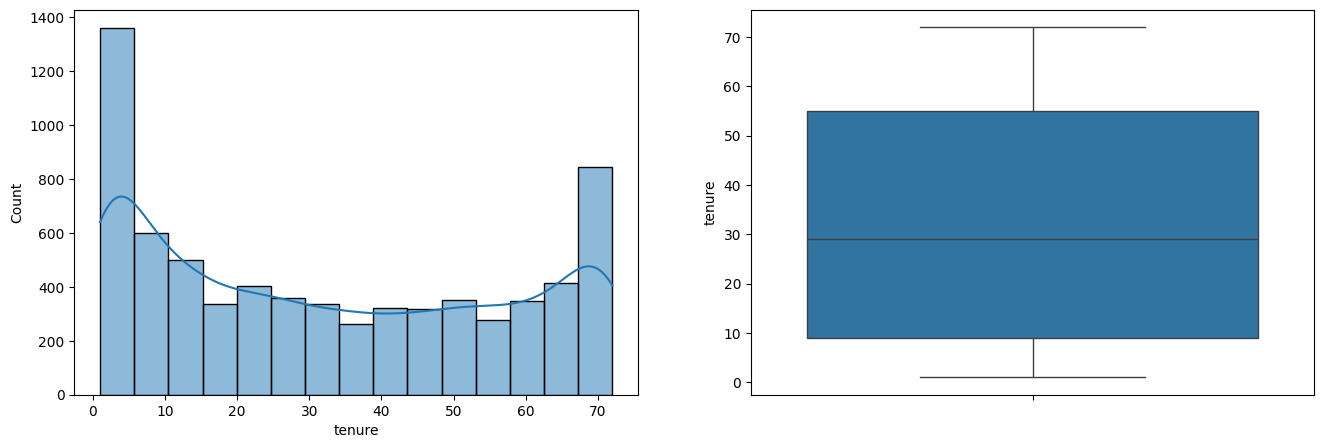

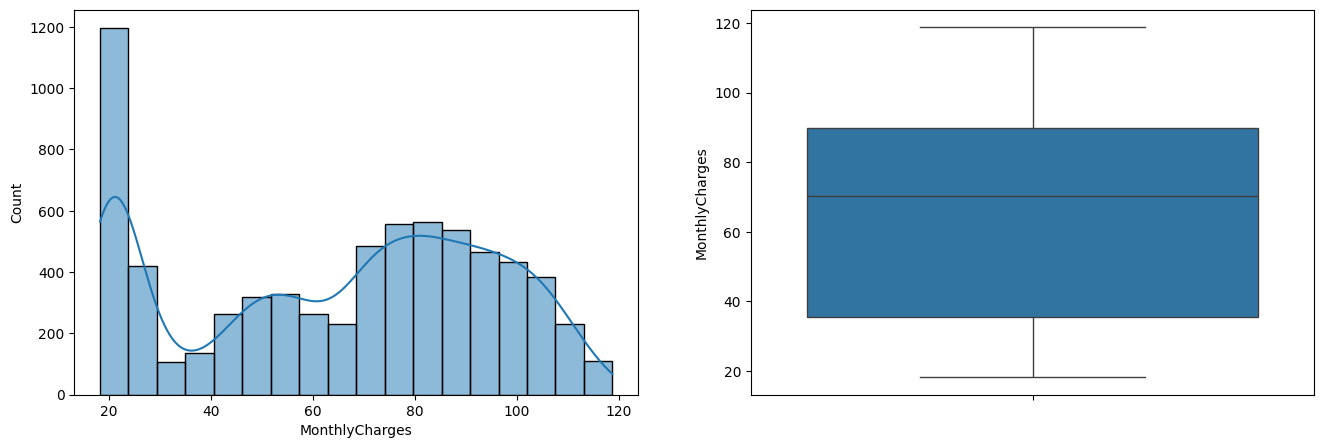

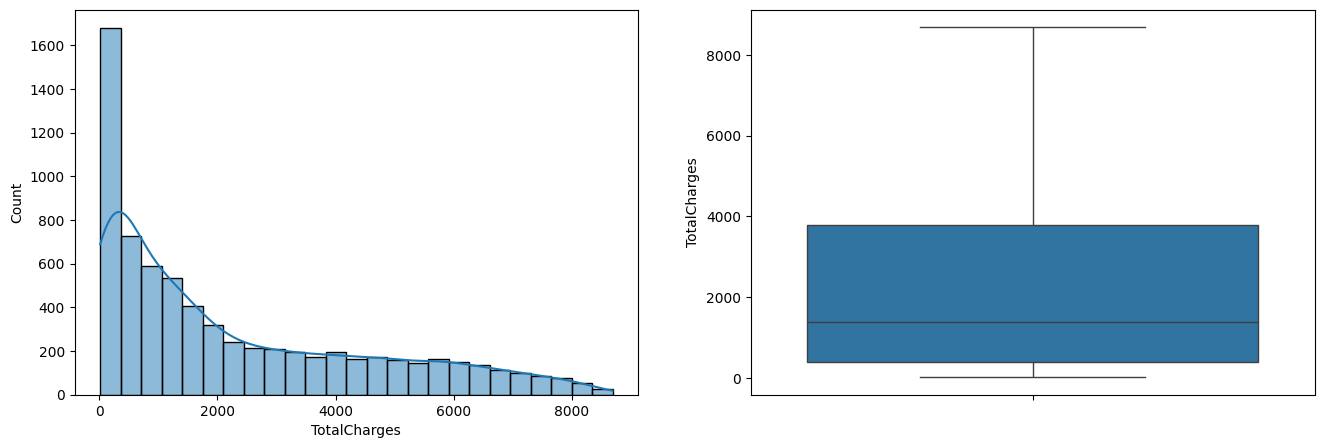

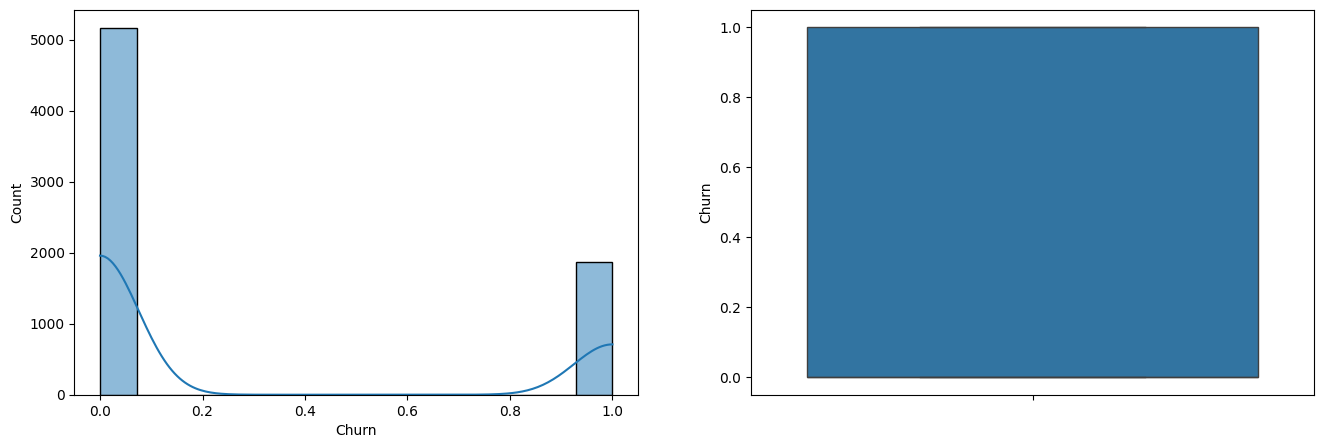

In [428]:
for col in numeric:    
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True)
    plt.subplot(1,2,2)
    sns.boxplot(data[col])

#It seems that there are no outliers in our numerical features

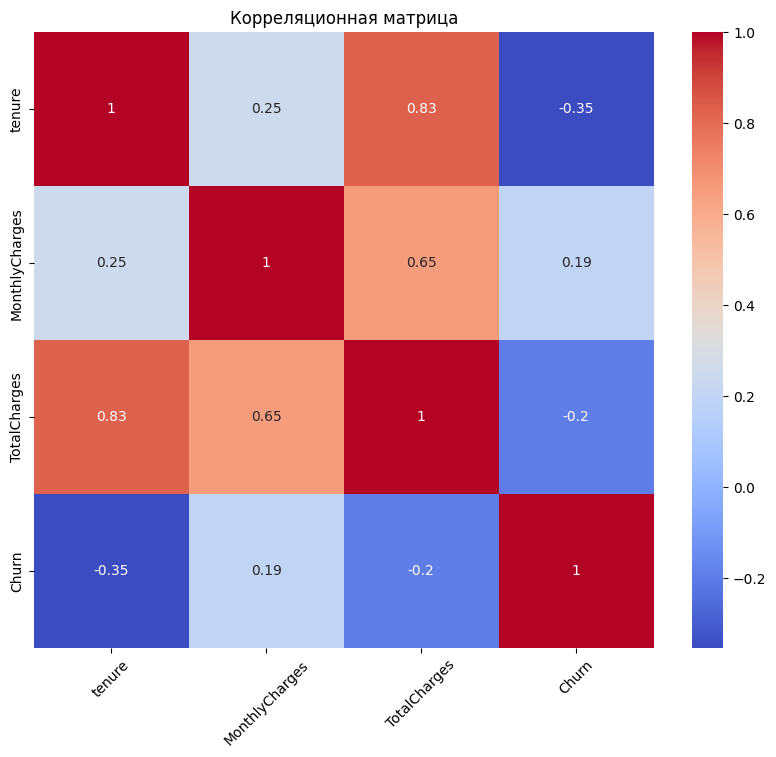

In [429]:
correlation = data[numeric].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.xticks(rotation=45)
plt.show()

#There is a medium correlation between Churn and tenure with -0.35 
#a low correlation with Monthly and TotalCharges of 0.19 and -0.2
#There is a medium correlation between monthly and totalcharges with 0.65 value
#which is to be expected from their names and a high correlation between the tenure
#and total charged of 0.83 

In [430]:
for col in categorical:
    print(col, data[col].unique())



gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
SeniorCitizen [0 1]


In [431]:
data['OnlineBackup'].value_counts()
#Features with "No internet service" possible values are tricky as there are many instances of it
#hence any assumptions we make can and will make a difference, therefore it is safer to use one-hot 
#encoding. Another option could be label-encoding with {no service: 0, no: 1, yes: 2} or assume that
#a "No internet service" values are meant to be "No"


OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

In [432]:
data['Contract'].value_counts()
#it makes sense for contract to be an ordinal variable
#hence one-label encoding will be used

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [433]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [434]:
#one-hot encoding our categorical values

binary = {'No': 0, 'Yes': 1, 'Female': 0, 'Male': 1}

for col in categorical:
    if (data[col].unique().size == 2):
        data[col] = data[col].replace(binary)
    else:
        #one hot encode the rest using pandas get_dummies
        #drop_first=True drops one column so we avoid the problem of multicollinearity
        dummies = pd.get_dummies(data[col], columns=[col], prefix=col, drop_first=True)
        data = pd.concat([data, dummies], axis=1)
        data.drop(col, axis=1, inplace=True)

data.shape

/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_38468/3415814311.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace(binary)
/var/folders/vs/z5ttscs922g_v2lcwrqfw4b40000gn/T/ipykernel_38468/3415814311.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace(binary)


(7032, 31)

In [435]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [436]:
data[data['Churn'] == 1].describe().T['mean']

gender                 0.497592
SeniorCitizen          0.254682
Partner                0.357945
Dependents             0.174425
tenure                17.979133
PhoneService           0.909042
PaperlessBilling       0.749064
MonthlyCharges        74.441332
TotalCharges        1531.796094
Churn                  1.000000
Name: mean, dtype: float64

In [437]:
#Lists of demografical and behavioral features to analyse against our target variable
#Excluding what we analysed previously
demographic = ["gender", "SeniorCitizen", "Partner", "Dependents"]
behavioral = ["tenure", "PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", 
              "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", 
              "Contract", "PaperlessBilling", "PaymentMethod", "MonthlyCharges", "TotalCharges"]



In [438]:
for col in demographic:
    print(col, data[col].unique())

#It seems we only have binary values in our demographic column so we
#can use the mean to find out if there is a bias towards a positive outcome

gender [0 1]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]


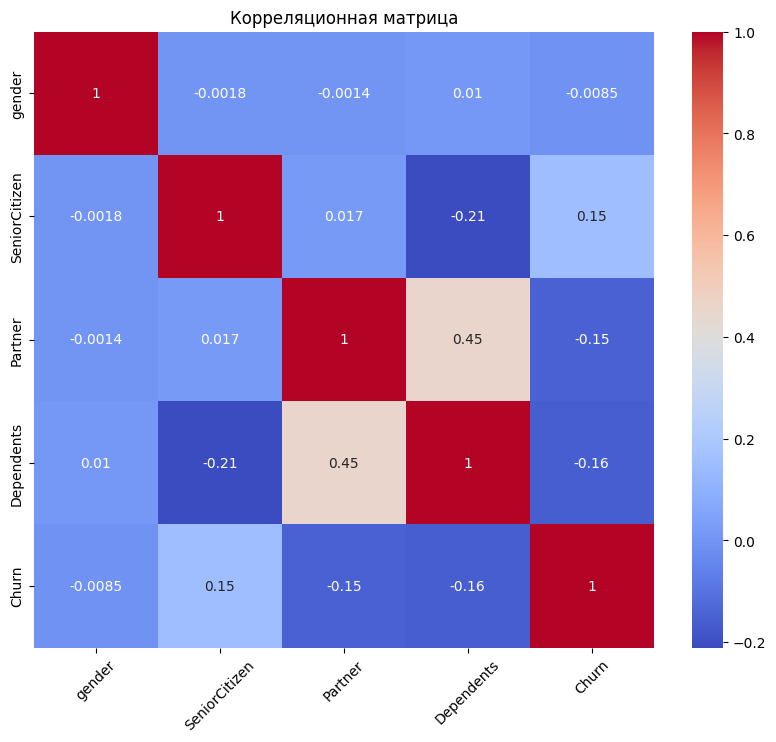

In [439]:
correlation = data[demographic + ['Churn']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.xticks(rotation=45)
plt.show()

#We can see there is a weak correlation between seniorCitizen, Partner and Dependents
#features against Churn of 0.15-0.16 meaning they don't contribute much
#There however is a medium correlation between dependents and partner features with 
#a value of 0.45, it makes sense assuming a partner is considered a dependency 
#A low correlation of dependents and seniorCitizen of 0.21

In [440]:
'''for col in demographic:
    print(col, data[data['Churn'] == 1][col].mean())'''

#as we see the mean for gender is around 0.5 meaning it doesn't contribute towards a positive outcome
#A low average of ~0.25 for SeniorCitizen means that there is a higher churn probability for non-seniors

#Scrapped logic due to the imbalance in the features values

gender 0.49759229534510435
SeniorCitizen 0.2546816479400749
Partner 0.3579454253611557
Dependents 0.17442482611021937
